In [192]:
import multiprocessing as mp
import subprocess
import sys
import os
import itertools
from scipy.io import savemat
from scipy.io import loadmat
import numpy as np

import pickle
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib import font_manager 
font_manager.fontManager.addfont('Arial.ttf')

In [193]:
mp.cpu_count()
num_cycles = 6

In [194]:
set_basis_type = ["Z", "X"];
set_budget_component = ["None"] ;
set_error_rate_excess = [0.005, 0.02, 0.035, 0.050, 0.065, 0.08] ;

args = [(basis, budget_component, error_rate_excess) for basis in set_basis_type  \
                for budget_component in set_budget_component  for error_rate_excess in set_error_rate_excess] ;

In [195]:
script = "simulation.py"

def run_Budget_sim(basis_type, budget_component, error_rate_excess):
    subprocess.run([sys.executable, script, str(basis_type), str(budget_component), str(error_rate_excess) ])

with mp.Pool(processes = 120) as pool:
    pool.starmap(run_Budget_sim, args)

In [196]:
mean_exp_detect_z = 0.319 ;
mean_exp_detect_x = 0.318 ;

In [208]:
set_detect_diff = [] ;
list_syndrome_history_Z = [] ;
list_syndrome_history_X = [] ;

for error_rate_excess in set_error_rate_excess:

    fnamez = './Numerical_data/' + 'Logical_Z_' + 'budget_' + "None" + '_excess_' + str(error_rate_excess) + '.mat'
    dataz = loadmat(fnamez)
    syndrome_history_Z = dataz["syndrome_history_Z"] 
    list_syndrome_history_Z.append(syndrome_history_Z)
    mean_sim_detect_z = np.mean( np.mean(syndrome_history_Z, axis=0) )

    fnamex = './Numerical_data/' + 'Logical_X_' + 'budget_' + "None" + '_excess_' + str(error_rate_excess) + '.mat'
    datax = loadmat(fnamex)
    syndrome_history_X = datax["syndrome_history_X"] 
    list_syndrome_history_X.append(syndrome_history_X)
    mean_sim_detect_x = np.mean( np.mean(syndrome_history_X, axis=0) )

    set_detect_diff.append( (mean_exp_detect_x + mean_exp_detect_z - mean_sim_detect_x - mean_sim_detect_z)/2 )    

In [215]:
set_detect_diff

[0.05899072362395738,
 0.039485113179618836,
 0.024203111546838962,
 0.009829946112999838,
 -0.0014570168693091579,
 -0.012327558555048607]

In [216]:
np.mean( np.mean(list_syndrome_history_X[2], axis=0) )

0.30059750135795765

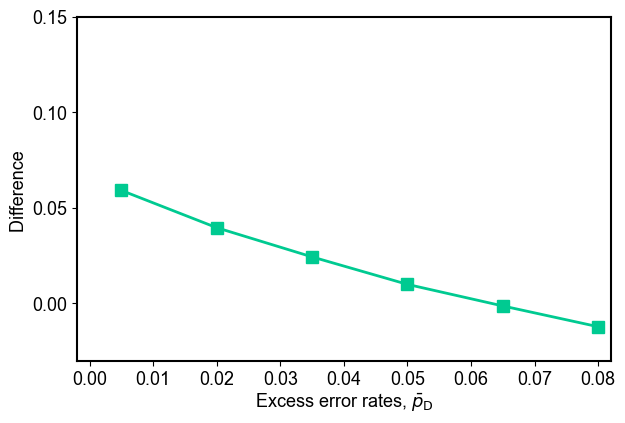

In [212]:
color_list = ["maroon", "teal", "dimGray", "#FF8C00", "#BC8F8F", "#7FFFAA"]

plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams.update({'font.size': 13})
fontsize = 13 ;

fig, ax = plt.subplots(1, 1)
ax11 = ax

spine_width = 1.5 ;

ax11.spines['top'].set_linewidth(spine_width)    
ax11.spines['bottom'].set_linewidth(spine_width) 
ax11.spines['left'].set_linewidth(spine_width)   
ax11.spines['right'].set_linewidth(spine_width)  

ax11.set_xlim(-0.002, 0.082)

ax11.xaxis.set_major_locator(ticker.MultipleLocator(0.01))  

ax11.yaxis.set_major_locator(ticker.MultipleLocator(0.05))  

ax11.set_ylim(-0.03, 0.15)

ax11.plot( set_error_rate_excess, set_detect_diff, color = (0/255,202/255,145/255), linestyle = "-", linewidth = 2, 
        marker = 's', markersize = 8 )


# ax11.legend(frameon=True, loc=(0.6, 0.02), labelspacing=0.4, fontsize=f'{fontsize}')
ax11.set_xlabel(r'Excess error rates, $\bar{p}_{\text{D}}$', labelpad = 2) 
ax11.set_ylabel('Difference ', labelpad = 3) 

plt.subplots_adjust(left = 0.1, bottom = 0.12, top = 0.98, right = 0.99, hspace = 0.0, wspace = 0.1) 
plt.show()
# fig.savefig('Experimental_Figures/detection_prob_18_4_4.pdf', format='pdf', facecolor='None')